In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

## Data generation

In [8]:
def rotation_matrix(theta):
    return np.array([[ np.cos(theta), np.sin(theta)], 
                     [-np.sin(theta), np.cos(theta)]])

In [9]:
def generate_balls(steps=1000, period=1000, radius=5, var1=1, var2=1, center=(0,0)):
    i = -1
    
    def cond():
        if not steps:
            # Go forever
            return True
        else:
            return i < steps
    
    locs = np.array([center, center]).copy()
    locs[0,0] += radius
    locs[1,0] -= radius
    
    scales = [var1, var2]
    dtheta = 2*np.pi/period
    rot = rotation_matrix(dtheta)
    
    while cond():
        i += 1
        locs = locs@rot  # rotate by dtheta
                
        lab = np.random.choice([0,1])
        x = np.random.normal(loc=locs[lab], scale=scales[lab])
        yield np.hstack([x,lab])

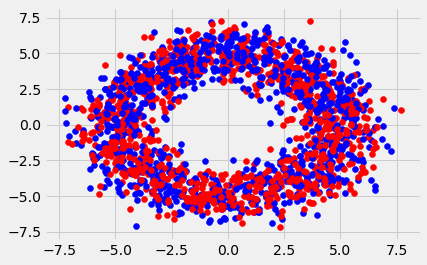

In [13]:
for x in generate_balls(2000, 1000):
    plt.scatter(*x[:2], color=['r','b'][int(x[-1])])

In [6]:
n = 10000
df = pd.DataFrame(generate_balls(n, 15000), columns=['x1','x2','y'])
df['t'] = pd.Series(range(n))

## track location of points